# Лабараторная работа 3
## Классификация в sklearn. Метрики классификации.
Выполнил: 6131-010402D, **Музыка Артем Алексеевич**

### Выбор и описание набора данных

In [95]:
import pandas as pd

In [96]:
df = pd.read_csv('data/spotify.csv')

C:\Users\Stormrage\AppData\Local\Temp\ipykernel_4304\810925950.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/spotify.csv')


In [97]:
df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN


10. Колонки с 0 по 10 являются характеристиками песен, представленнные в `float64` или `int64` типе. 
11. **type** - тип файла в экосистеме spotify. Тип: `object` 
12.  **id** - является буквенно-численным идентификатором песни. Тип: `object`
13.  **uri** - своего рода ссылка на файл. Тип: `object` 
14.  **track_href** своего рода https-ссылка на файл. Тип: `object` 
15.  **analysis_url** своего рода https-ссылка на анализ. Тип: `object` 
16.  **duration_ms** - продолжительность трека в милисекундах. Тип: `int64`
17.  **time_signature** - размер песни. Тип:  `int64`  
18.  **genre** - жанр песни. Будет выступать в роли классов для классификации. Тип: `object`
19.  **song_name** - название песни. Тип: `object`
20.  **Unnamed: 0** - безыменные треки. Тип: `int64`
21.  **title** - название плейлиста в котором хранится трек. Тип: `object` 

### Преобработка наборов данных
Сначала удалим колонки, которые не имеют для нас значения. 

In [98]:
for_delete = ['type','uri','track_href','analysis_url','song_name','Unnamed: 0', 'title', 'id']
for f in for_delete:
    df.pop(f)

Теперь создадим отдельно список жанров и преобразуем его в целочисленный вид.

In [99]:
genres = list(df["genre"])

In [100]:
def repitless(lst):
    new_list = []
    for g in lst:
        if g not in new_list:
            new_list.append(g)
    return new_list

def str_to_int(lst):
    less = repitless(lst)
    for g in range(len(less)):
        for genre in range(len(lst)):
            if lst[genre] == less[g]:
                lst[genre] = g
    return lst

In [101]:
Y_spotify = str_to_int(list(df["genre"]))

In [102]:
df.pop('genre')

0        Dark Trap
1        Dark Trap
2        Dark Trap
3        Dark Trap
4        Dark Trap
           ...    
42300    hardstyle
42301    hardstyle
42302    hardstyle
42303    hardstyle
42304    hardstyle
Name: genre, Length: 42305, dtype: object

## 1. Многоклассовая классификация
### 1.1 Простой пример с оценкой accuracy.
Задача состоит в следующем. Делим датасет на тестовую и тренирочную выборки. Обучаем классификатор распозновать жанр на основе характеристик песен. Проверяем результативность. Всего в датасете представлено 15 жанров (классов). В качестве модели используем простой линейный классификатор.

In [103]:
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
X_spotify = []
for i in range(len(df)):
    X_spotify.append([])
for column in list(df):
    new_list = list(df[column])
    for i in range(len(new_list)):
        X_spotify[i].append(new_list[i])


In [72]:
data_spotify, labels_spotify = shuffle(X_spotify, Y_spotify)

In [81]:
test_size = int(len(data_spotify) * 0.9)
Xtrain_spotify = data_spotify[:test_size]
Ytrain_spotify = labels_spotify[:test_size]
Xtest_spotify = data_spotify[test_size:]
Ytest_spotify = labels_spotify[test_size:]

In [71]:
clf = LogisticRegression()
clf.fit(Xtrain_spotify, Ytrain_spotify)
predictions = clf.predict(Xtest_spotify)
accuracy_score(Ytest_spotify, predictions)

0.23540534152682582

### 1.2 С применением кросс-валидации

In [14]:
from sklearn.model_selection import cross_validate

In [73]:
cross_validate(clf, data_spotify, labels_spotify, cv=5)

{'fit_time': array([0.94886136, 1.6064589 , 1.73857903, 0.95186448, 1.60345602]),
 'score_time': array([0.02001858, 0.01801586, 0.01801705, 0.01701498, 0.02001786]),
 'test_score': array([0.21959579, 0.22302328, 0.22645077, 0.22314147, 0.2305874 ])}

### 1.3 Работа с гиперпараметрами

`LogisticRegression` имеет следующие гиперпараметры:
1. **penalty:**{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
2. **dual**: bool, default=False
3. **tolf:** loat, default=1e-4
4. **C:** float, default=1.0
5. **fit_intercept:** bool, default=True
6. **intercept_scaling:** float, default=1
7. **class_weight:** dict or ‘balanced’, default=None
8. **random_state:** int, RandomState instance, default=None
9. **solver:** {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

In [74]:
from random import randint

In [75]:
penalty = ['l2','none']
dual = [False,True]
c = 1
fit_intercept = [False, True]
intercept_scaling_p = 1
class_weight = ['balanced', None]
solver = ['sag','saga', 'liblinear']

In [76]:
best = 0
for pen in penalty:
    for du in dual:
        while c < 10:
            for fit_i in fit_intercept:
                while intercept_scaling_p < 10:
                    for cw in class_weight:
                        for sol in solver:
                            classifier = LogisticRegression(penalty=pen, dual=du, C=c, fit_intercept=fit_i, intercept_scaling=intercept_scaling_p, class_weight=cw, random_state=randint(1,10), solver=sol)
                            classifier.fit(Xtrain_spotify, Ytrain_spotify)
                            predict = classifier.predict(Xtest_spotify)
                            score = accuracy_score(Ytest_spotify, predict)
                            c+=0.1
                            intercept_scaling_p+=0.1
                            print(f"{classifier} score {score}")
                            if score > best:
                                best = score
                                best_classifier = classifier

C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, class_weight='balanced', fit_intercept=False,
                   random_state=10, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.1, class_weight='balanced', fit_intercept=False,
                   intercept_scaling=1.1, random_state=2, solver='saga') score 0.0789411486646183
LogisticRegression(C=1.2000000000000002, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=1.2000000000000002,
                   random_state=10, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.3000000000000003, fit_intercept=False,
                   intercept_scaling=1.3000000000000003, random_state=10,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.4000000000000004, fit_intercept=False,
                   intercept_scaling=1.4000000000000004, random_state=7,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=1.5000000000000004, fit_intercept=False,
                   intercept_scaling=1.5000000000000004, random_state=1,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.6000000000000005, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=1.6000000000000005,
                   random_state=6, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.7000000000000006, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=1.7000000000000006,
                   random_state=10, solver='saga') score 0.0789411486646183
LogisticRegression(C=1.8000000000000007, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=1.8000000000000007,
                   random_state=3, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1.9000000000000008, fit_intercept=False,
                   intercept_scaling=1.9000000000000008, random_state=5,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.000000000000001, fit_intercept=False,
                   intercept_scaling=2.000000000000001, random_state=8,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=2.100000000000001, fit_intercept=False,
                   intercept_scaling=2.100000000000001, random_state=8,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.200000000000001, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=2.200000000000001,
                   random_state=4, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.300000000000001, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=2.300000000000001,
                   random_state=5, solver='saga') score 0.0789411486646183
LogisticRegression(C=2.4000000000000012, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=2.4000000000000012,
                   random_state=4, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.5000000000000013, fit_intercept=False,
                   intercept_scaling=2.5000000000000013, random_state=9,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.6000000000000014, fit_intercept=False,
                   intercept_scaling=2.6000000000000014, random_state=7,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=2.7000000000000015, fit_intercept=False,
                   intercept_scaling=2.7000000000000015, random_state=10,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.8000000000000016, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=2.8000000000000016,
                   random_state=8, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=2.9000000000000017, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=2.9000000000000017,
                   random_state=6, solver='saga') score 0.0789411486646183
LogisticRegression(C=3.0000000000000018, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=3.0000000000000018,
                   random_state=2, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=3.100000000000002, fit_intercept=False,
                   intercept_scaling=3.100000000000002, random_state=4,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=3.200000000000002, fit_intercept=False,
                   intercept_scaling=3.200000000000002, random_state=6,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=3.300000000000002, fit_intercept=False,
                   intercept_scaling=3.300000000000002, random_state=4,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=3.400000000000002, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=3.400000000000002,
                   random_state=2, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=3.500000000000002, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=3.500000000000002,
                   random_state=4, solver='saga') score 0.0789411486646183
LogisticRegression(C=3.6000000000000023, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=3.6000000000000023,
                   random_state=5, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=3.7000000000000024, fit_intercept=False,
                   intercept_scaling=3.7000000000000024, random_state=9,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=3.8000000000000025, fit_intercept=False,
                   intercept_scaling=3.8000000000000025, random_state=7,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=3.9000000000000026, fit_intercept=False,
                   intercept_scaling=3.9000000000000026, random_state=9,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.000000000000003, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=4.000000000000003,
                   random_state=2, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.100000000000002, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=4.100000000000002,
                   random_state=2, solver='saga') score 0.0789411486646183
LogisticRegression(C=4.200000000000002, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=4.200000000000002,
                   random_state=8, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.300000000000002, fit_intercept=False,
                   intercept_scaling=4.300000000000002, random_state=9,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.400000000000001, fit_intercept=False,
                   intercept_scaling=4.400000000000001, random_state=9,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=4.500000000000001, fit_intercept=False,
                   intercept_scaling=4.500000000000001, random_state=9,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.6000000000000005, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=4.6000000000000005,
                   random_state=7, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.7, class_weight='balanced', fit_intercept=False,
                   intercept_scaling=4.7, random_state=10, solver='saga') score 0.0789411486646183
LogisticRegression(C=4.8, class_weight='balanced', fit_intercept=False,
                   intercept_scaling=4.8, random_state=1, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.8999999999999995, fit_intercept=False,
                   intercept_scaling=4.8999999999999995, random_state=7,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=4.999999999999999, fit_intercept=False,
                   intercept_scaling=4.999999999999999, random_state=2,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=5.099999999999999, fit_intercept=False,
                   intercept_scaling=5.099999999999999, random_state=4,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5.199999999999998, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=5.199999999999998,
                   random_state=6, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5.299999999999998, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=5.299999999999998,
                   random_state=6, solver='saga') score 0.0789411486646183
LogisticRegression(C=5.399999999999998, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=5.399999999999998,
                   random_state=6, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5.499999999999997, fit_intercept=False,
                   intercept_scaling=5.499999999999997, random_state=3,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5.599999999999997, fit_intercept=False,
                   intercept_scaling=5.599999999999997, random_state=3,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=5.699999999999997, fit_intercept=False,
                   intercept_scaling=5.699999999999997, random_state=5,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5.799999999999996, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=5.799999999999996,
                   random_state=6, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=5.899999999999996, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=5.899999999999996,
                   random_state=9, solver='saga') score 0.0789411486646183
LogisticRegression(C=5.999999999999996, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=5.999999999999996,
                   random_state=7, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=6.099999999999995, fit_intercept=False,
                   intercept_scaling=6.099999999999995, random_state=7,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=6.199999999999995, fit_intercept=False,
                   intercept_scaling=6.199999999999995, random_state=6,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=6.2999999999999945, fit_intercept=False,
                   intercept_scaling=6.2999999999999945, random_state=3,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=6.399999999999994, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=6.399999999999994,
                   random_state=3, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=6.499999999999994, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=6.499999999999994,
                   random_state=10, solver='saga') score 0.0789411486646183
LogisticRegression(C=6.599999999999993, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=6.599999999999993,
                   random_state=1, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=6.699999999999993, fit_intercept=False,
                   intercept_scaling=6.699999999999993, random_state=2,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=6.799999999999993, fit_intercept=False,
                   intercept_scaling=6.799999999999993, random_state=9,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=6.899999999999992, fit_intercept=False,
                   intercept_scaling=6.899999999999992, random_state=2,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=6.999999999999992, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=6.999999999999992,
                   random_state=4, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.099999999999992, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=7.099999999999992,
                   random_state=6, solver='saga') score 0.0789411486646183
LogisticRegression(C=7.199999999999991, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=7.199999999999991,
                   random_state=7, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.299999999999991, fit_intercept=False,
                   intercept_scaling=7.299999999999991, random_state=9,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.399999999999991, fit_intercept=False,
                   intercept_scaling=7.399999999999991, random_state=2,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=7.49999999999999, fit_intercept=False,
                   intercept_scaling=7.49999999999999, random_state=5,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.59999999999999, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=7.59999999999999,
                   random_state=5, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.6999999999999895, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=7.6999999999999895,
                   random_state=4, solver='saga') score 0.0789411486646183
LogisticRegression(C=7.799999999999989, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=7.799999999999989,
                   random_state=9, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.899999999999989, fit_intercept=False,
                   intercept_scaling=7.899999999999989, random_state=5,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=7.9999999999999885, fit_intercept=False,
                   intercept_scaling=7.9999999999999885, random_state=1,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=8.099999999999989, fit_intercept=False,
                   intercept_scaling=8.099999999999989, random_state=8,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=8.199999999999989, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=8.199999999999989,
                   random_state=10, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=8.299999999999988, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=8.299999999999988,
                   random_state=5, solver='saga') score 0.0789411486646183
LogisticRegression(C=8.399999999999988, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=8.399999999999988,
                   random_state=7, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=8.499999999999988, fit_intercept=False,
                   intercept_scaling=8.499999999999988, random_state=1,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=8.599999999999987, fit_intercept=False,
                   intercept_scaling=8.599999999999987, random_state=6,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=8.699999999999987, fit_intercept=False,
                   intercept_scaling=8.699999999999987, random_state=3,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=8.799999999999986, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=8.799999999999986,
                   random_state=1, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=8.899999999999986, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=8.899999999999986,
                   random_state=6, solver='saga') score 0.0789411486646183
LogisticRegression(C=8.999999999999986, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=8.999999999999986,
                   random_state=3, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9.099999999999985, fit_intercept=False,
                   intercept_scaling=9.099999999999985, random_state=9,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9.199999999999985, fit_intercept=False,
                   intercept_scaling=9.199999999999985, random_state=5,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=9.299999999999985, fit_intercept=False,
                   intercept_scaling=9.299999999999985, random_state=5,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9.399999999999984, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=9.399999999999984,
                   random_state=9, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9.499999999999984, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=9.499999999999984,
                   random_state=6, solver='saga') score 0.0789411486646183
LogisticRegression(C=9.599999999999984, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=9.599999999999984,
                   random_state=6, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9.699999999999983, fit_intercept=False,
                   intercept_scaling=9.699999999999983, random_state=10,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9.799999999999983, fit_intercept=False,
                   intercept_scaling=9.799999999999983, random_state=1,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=9.899999999999983, fit_intercept=False,
                   intercept_scaling=9.899999999999983, random_state=8,
                   solver='liblinear') score 0.2389506026943985


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=9.999999999999982, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=9.999999999999982,
                   random_state=2, solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10.099999999999982, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=10.099999999999982,
                   random_state=5, solver='saga') score 0.0789411486646183
LogisticRegression(C=10.199999999999982, class_weight='balanced',
                   fit_intercept=False, intercept_scaling=10.199999999999982,
                   random_state=5, solver='liblinear') score 0.21696998345544788


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10.299999999999981, fit_intercept=False,
                   intercept_scaling=10.299999999999981, random_state=9,
                   solver='sag') score 0.0789411486646183


C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10.39999999999998, fit_intercept=False,
                   intercept_scaling=10.39999999999998, random_state=7,
                   solver='saga') score 0.0789411486646183
LogisticRegression(C=10.49999999999998, fit_intercept=False,
                   intercept_scaling=10.49999999999998, random_state=6,
                   solver='liblinear') score 0.2389506026943985


In [77]:
print(best_classifier)
print(score)

LogisticRegression(C=1.5000000000000004, fit_intercept=False,
                   intercept_scaling=1.5000000000000004, random_state=1,
                   solver='liblinear')
0.2389506026943985


### 1.4 Создание расширенной матрицы ошибок

In [78]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


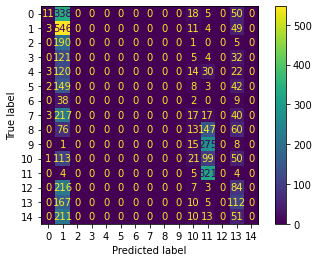

In [79]:
best_classifier.fit(Xtrain_spotify, Ytrain_spotify)
plot_confusion_matrix(best_classifier, Xtest_spotify, Ytest_spotify)

In [106]:
for i in range (len(repitless(genres))):
    print(f'{i}: {repitless(genres)[i]}')

0: Dark Trap
1: Underground Rap
2: Trap Metal
3: Emo
4: Rap
5: RnB
6: Pop
7: Hiphop
8: techhouse
9: techno
10: trance
11: psytrance
12: trap
13: dnb
14: hardstyle


## 2. Бинарная классификация

In [107]:
cancer_df = pd.read_csv('data/cancer.csv')

В данном датасете содержится характеристики ядер клеток, присутствующих на изображении молочной железы людей, а также диагноз (**М** - Malignant, т.е. злокачественное образование, **В** - benign, т.е. доброкачественное). Всего 31 характеристика с типом данных `float64`.

In [108]:
cancer_df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [109]:
Y_cancer = str_to_int(list(cancer_df['diagnosis']))

In [110]:
cancer_df.pop('id')
cancer_df.pop('diagnosis')
cancer_df.pop('Unnamed: 32')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [111]:
X_cancer = []
for i in range(len(cancer_df)):
    X_cancer.append([])
for column in list(cancer_df):
    new_list = list(cancer_df[column])
    for i in range(len(new_list)):
        X_cancer[i].append(new_list[i])

In [113]:
data_cancer, labels_cancer = shuffle(X_cancer, Y_cancer)

In [114]:
test_size = int(len(data_cancer) * 0.9)
Xtrain_cancer = data_cancer[:test_size]
Ytrain_cancer = labels_cancer[:test_size]
Xtest_cancer = data_cancer[test_size:]
Ytest_cancer = labels_cancer[test_size:]
clf = LogisticRegression()
clf.fit(Xtrain_cancer, Ytrain_cancer)
predictions = clf.predict(Xtest_cancer)
accuracy_score(Ytest_cancer, predictions)

C:\Users\Stormrage\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9298245614035088

## 3. С использованием нормализации признаков для двух датасетов

### Для Spotify датасета

In [118]:
from sklearn.preprocessing import normalize

In [122]:
def norma_data(data):
    for i in range(len(data[0])):
        new = []
        for j in range(len(data)):
            new.append(data[j][i])
        new = normalize([new])
    return new

In [123]:
norma_data(data_cancer)

array([[0.03334207, 0.04502082, 0.04434217, 0.05131427, 0.03537804,
        0.04647578, 0.03589069, 0.04062664, 0.04084147, 0.03508021,
        0.04214996, 0.03023196, 0.05204663, 0.04494759, 0.05092367,
        0.03457244, 0.03674512, 0.03865903, 0.03158439, 0.05194898,
        0.03627152, 0.04695914, 0.03387425, 0.06112794, 0.04315574,
        0.03328836, 0.04248196, 0.03541221, 0.03435761, 0.05341371,
        0.03770207, 0.04029464, 0.03221911, 0.03878597, 0.03711618,
        0.04690056, 0.03377172, 0.03304912, 0.04500618, 0.05126544,
        0.04960542, 0.03333718, 0.04721791, 0.04679802, 0.04653926,
        0.03071532, 0.0294166 , 0.03057862, 0.03217029, 0.05209545,
        0.05805201, 0.04388322, 0.03529015, 0.03782901, 0.04173983,
        0.03193593, 0.0332493 , 0.03241441, 0.04077311, 0.03719918,
        0.0399431 , 0.03616899, 0.03306377, 0.03748724, 0.04278467,
        0.03506556, 0.04296044, 0.03812684, 0.05639199, 0.04553348,
        0.04214019, 0.04315574, 0.03931327, 0.04

In [121]:
data_cancer

[[15.61,
  19.38,
  100.0,
  758.6,
  0.0784,
  0.05616,
  0.04209,
  0.02847,
  0.1547,
  0.05443,
  0.2298,
  0.9988,
  1.534,
  22.18,
  0.002826,
  0.009105,
  0.01311,
  0.005174,
  0.01013,
  0.001345,
  17.91,
  31.67,
  115.9,
  988.6,
  0.1084,
  0.1807,
  0.226,
  0.08568,
  0.2683,
  0.06829],
 [19.18,
  22.49,
  127.5,
  1148.0,
  0.08523,
  0.1428,
  0.1114,
  0.06772,
  0.1767,
  0.05529,
  0.4357,
  1.073,
  3.833,
  54.22,
  0.005524,
  0.03698,
  0.02706,
  0.01221,
  0.01415,
  0.003397,
  23.36,
  32.06,
  166.4,
  1688.0,
  0.1322,
  0.5601,
  0.3865,
  0.1708,
  0.3193,
  0.09221],
 [12.34,
  22.22,
  79.85,
  464.5,
  0.1012,
  0.1015,
  0.0537,
  0.02822,
  0.1551,
  0.06761,
  0.2949,
  1.656,
  1.955,
  21.55,
  0.01134,
  0.03175,
  0.03125,
  0.01135,
  0.01879,
  0.005348,
  13.58,
  28.68,
  87.36,
  553.0,
  0.1452,
  0.2338,
  0.1688,
  0.08194,
  0.2268,
  0.09082],
 [25.22,
  24.91,
  171.5,
  1878.0,
  0.1063,
  0.2665,
  0.3339,
  0.1845,
  0.1829,
  

### Для Cancer датасета